<a href="https://colab.research.google.com/github/AndrewChien78/WaterLevel/blob/master/MLP_Water_Level.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MLP for Water Level Times Series
This is the code from Jason Brownlee's Deep Learning Time Series Forecasting eBook, Chapter 7

## 7.2 Univariate MLP Models
### 7.2.1 Data preparation

In [1]:
# The code below does not to be run if the GDrive has been authorised and mounted
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Run this code instead if already authorised
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

In [2]:
#Setup input_data_File
input_data_file = '/content/gdrive//My Drive/Colab Notebooks/data/atimCreek2017-05-01.csv'

#import all of the libraries required:
from pandas import read_csv
from matplotlib import pyplot
from numpy import array
import pandas as pd
print("pandas Version is", pd.__version__)
# print("Pandas and other module version", pd.show_versions(as_json = False))

#load data using read_csv method function
series = read_csv(input_data_file, header=0)
wtr_lvl_series = series.drop(columns=['Date.and.Time'])

#Convert dataframe into numpy array
wtr_lvl_series = wtr_lvl_series['Water.Level..m.'].values
print(wtr_lvl_series)


pandas Version is 0.22.0
[8.721 8.721 8.724 8.723 8.719 8.723 8.724 8.723 8.721 8.729 8.727 8.723
 8.723 8.722 8.719 8.725 8.721 8.724 8.718 8.723 8.724 8.719 8.722 8.718
 8.724 8.725 8.716 8.725 8.727 8.718 8.717 8.715 8.725 8.717 8.725 8.723
 8.724 8.718 8.714 8.72  8.718 8.722 8.718 8.725 8.722 8.723 8.718 8.712
 8.721 8.725 8.713 8.718 8.718 8.719 8.722 8.722 8.717 8.718 8.718 8.715
 8.716 8.722 8.719 8.716 8.724 8.716 8.723 8.721 8.72  8.723 8.722 8.723
 8.72  8.722 8.718 8.719 8.723 8.709 8.718 8.718 8.711 8.719 8.72  8.722
 8.72  8.721 8.723 8.722 8.723 8.72  8.723 8.719 8.722 8.72  8.722 8.72
 8.721 8.724 8.728 8.727 8.725 8.729 8.727 8.724 8.721 8.721 8.719 8.717
 8.718 8.716 8.72  8.717 8.717 8.718 8.72  8.718 8.72  8.715 8.722 8.718
 8.721 8.718 8.719 8.725 8.721 8.718 8.723 8.717 8.725 8.714 8.722 8.715
 8.721 8.713 8.723 8.722 8.719 8.727 8.726 8.725 8.726 8.727 8.729 8.717
 8.724 8.727 8.724 8.728 8.726 8.731 8.723 8.718 8.723 8.723 8.726 8.719
 8.72  8.714 8.718 8.721 8.

In [3]:
# Univariate Data Preparation

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
	X, y = list(), list()
	for i in range(len(sequence)):
		# find the end of this pattern
		end_ix = i + n_steps
		# check if we are beyond the sequence
		if end_ix > len(sequence)-1:
			break
		# gather input and output parts of the pattern
		seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
		X.append(seq_x)
		y.append(seq_y)
	return array(X), array(y)

# define input sequence
raw_seq = wtr_lvl_series
# choose a number of time steps
n_steps = 3
# split into samples
X, y = split_sequence(raw_seq, n_steps)
# summarize the data
for i in range(len(X)):
	print("Input", X[i], "Output", y[i])

Input [8.721 8.721 8.724] Output 8.722999999999999
Input [8.721 8.724 8.723] Output 8.719
Input [8.724 8.723 8.719] Output 8.722999999999999
Input [8.723 8.719 8.723] Output 8.724
Input [8.719 8.723 8.724] Output 8.722999999999999
Input [8.723 8.724 8.723] Output 8.721
Input [8.724 8.723 8.721] Output 8.729
Input [8.723 8.721 8.729] Output 8.727
Input [8.721 8.729 8.727] Output 8.722999999999999
Input [8.729 8.727 8.723] Output 8.722999999999999
Input [8.727 8.723 8.723] Output 8.722000000000001
Input [8.723 8.723 8.722] Output 8.719
Input [8.723 8.722 8.719] Output 8.725
Input [8.722 8.719 8.725] Output 8.721
Input [8.719 8.725 8.721] Output 8.724
Input [8.725 8.721 8.724] Output 8.718
Input [8.721 8.724 8.718] Output 8.722999999999999
Input [8.724 8.718 8.723] Output 8.724
Input [8.718 8.723 8.724] Output 8.719
Input [8.723 8.724 8.719] Output 8.722000000000001
Input [8.724 8.719 8.722] Output 8.718
Input [8.719 8.722 8.718] Output 8.724
Input [8.722 8.718 8.724] Output 8.725
Input [

## 7.2.2 MLP Model

To understand more about the Sequential model in Keras visit this link:
https://towardsdatascience.com/building-a-deep-learning-model-using-keras-1548ca149d37

`model = Sequential()` The model used here is the Sequential model.<br>
`model.add(Dense(100,activation='relu',input_dim=n_steps))` This line says the number of neurons in the first hidden layer after the input layer is set to 100, the activation function is "Rectified Linear Activation" type (other types are softmax and sigmoid) and the no. neurons in the input layer is 3 matching the number of features of the dataset. Keras has a library to draw the layers see https://keras.io/visualization/ 
The image below shows the visualization of the code.

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


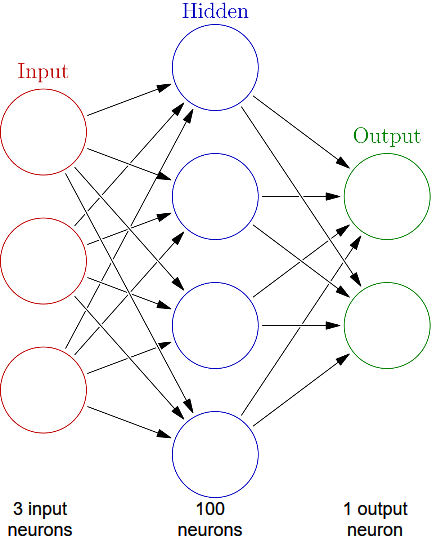

In [0]:
from google.colab import drive
drive.mount('/content/gdrive')
from IPython.display import Image
Image('/content/gdrive/My Drive/Colab Notebooks/NeuralNetwork.png')

In [4]:
# univariate mlp example
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

# define model
model = Sequential()
model.add(Dense(100, activation='relu', input_dim=n_steps))
model.add(Dense((1), activation='relu'))
model.compile(optimizer='adam', loss='mse')
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)
SVG(model_to_dot(model).create(prog='dot', format='svg'))
# Image('/content/model.png')
# fit model
model.fit(X, y, epochs=2000, verbose=0)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 501
Trainable params: 501
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.


In [5]:
# demonstrate prediction
x_input = array([8.713, 8.714, 8.719])
print("before reshape", x_input)
x_input = x_input.reshape((1, n_steps))
print("after reshape", x_input)
yhat = model.predict(x_input, verbose=0)
print(yhat)

before reshape [8.713 8.714 8.719]
after reshape [[8.713 8.714 8.719]]
[[8.718581]]


## Success GDP1031: 
### 26 Feb 2019: Managed to get the model to predict 8.718 for an input of 8.713, 8.714, 8.719. The expected output should be 8.715m
Note: Must remember to restart runtime once a certain part of the code has been executed once.

In [0]:
from google.colab import files

files.download('model.png')